In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

In [14]:
df = pd.read_csv('cleaned_extracted_data.csv')
#Separate the input features and target values
X = df.drop(['SHLT', 'COGTOT', 'MSTOT'], axis=1)  # Input features
y = df[['SHLT', 'COGTOT', 'MSTOT']]  # Target variables

In [20]:
continuous_features = ['SHLT', 'BMI', 'MSTOT', 'COGTOT', 'INHPFN',  'HHHRES', 'HCHILD','LIVSIB',  'HAIRA', 'HATOTB', 'IEARN','HITOT', 'PRPCNT']
cate_features = ['INHPE','HINPOV', 'HINPOVA','PENINC', 'HIGOV','RETMON', 'SLFEMP']

In [23]:
# detect and remove outliers
print(df.shape)
clf = IsolationForest(random_state=42, contamination=0.15)
outliers = clf.fit_predict(df)
cleaned_df = df[outliers == 1]
print(cleaned_df.shape)

(38487, 20)
(32714, 20)


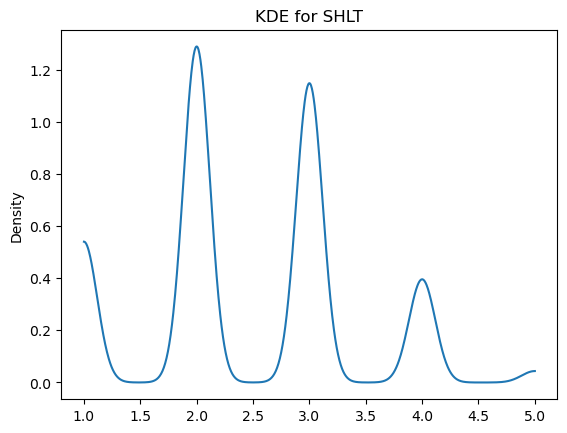

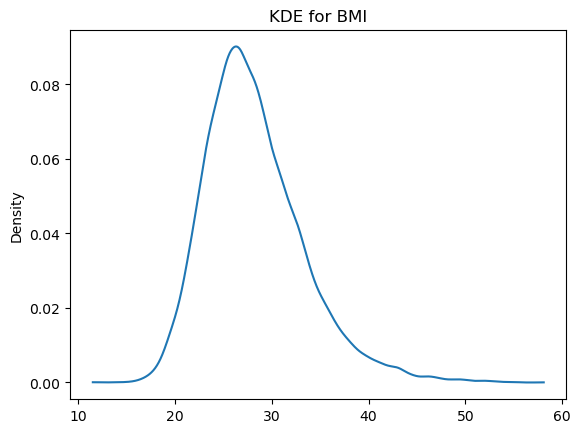

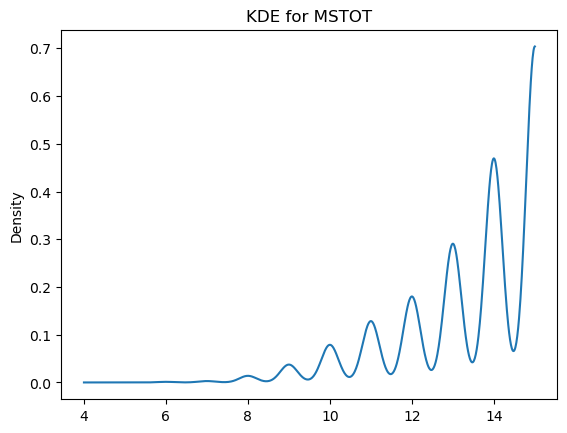

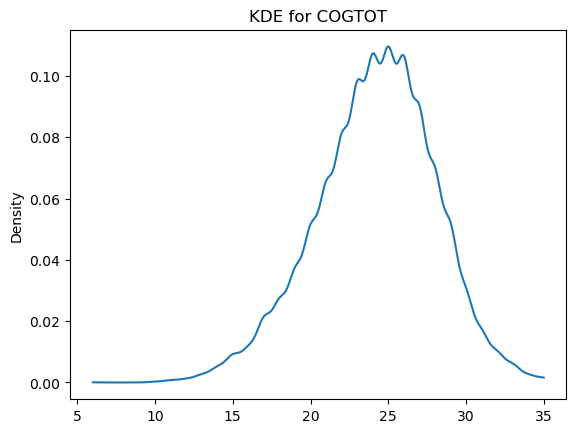

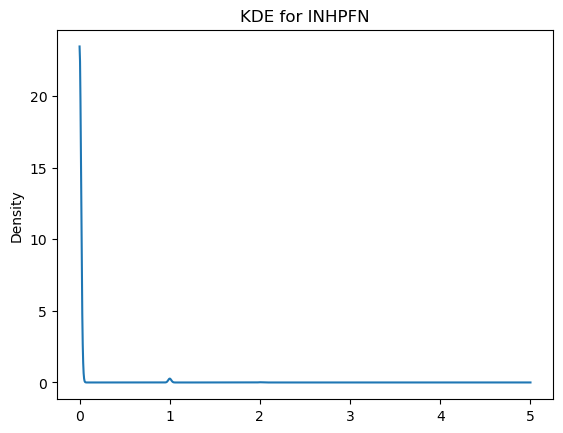

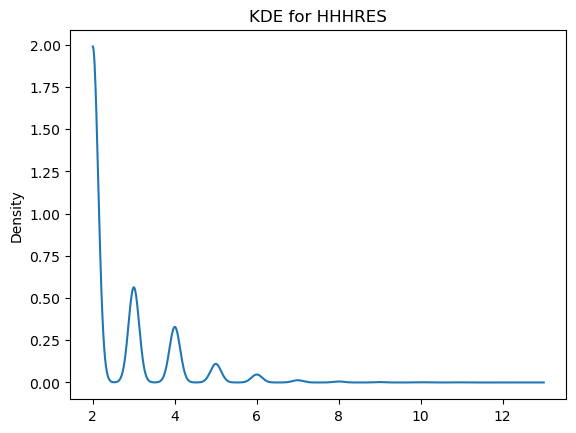

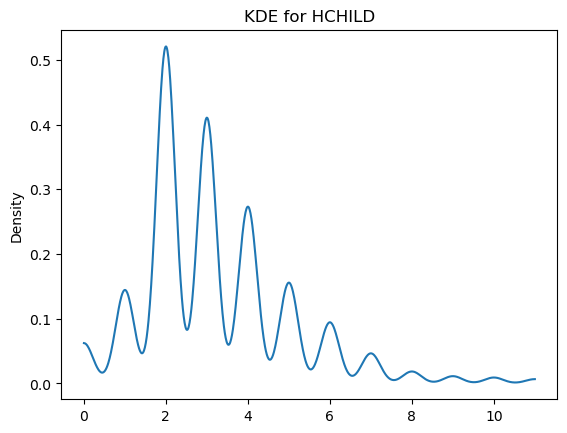

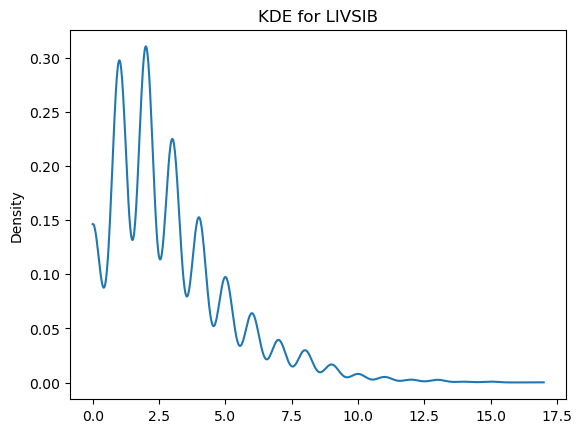

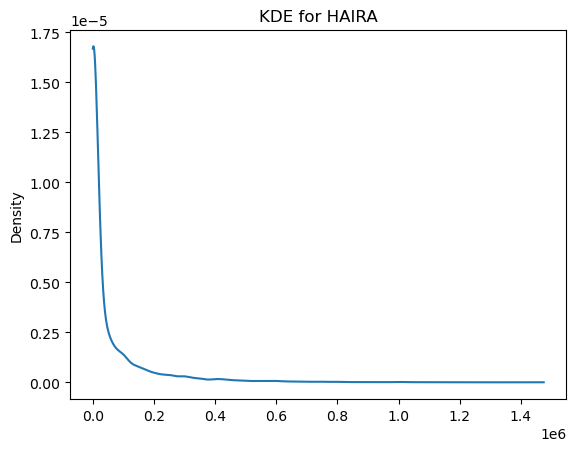

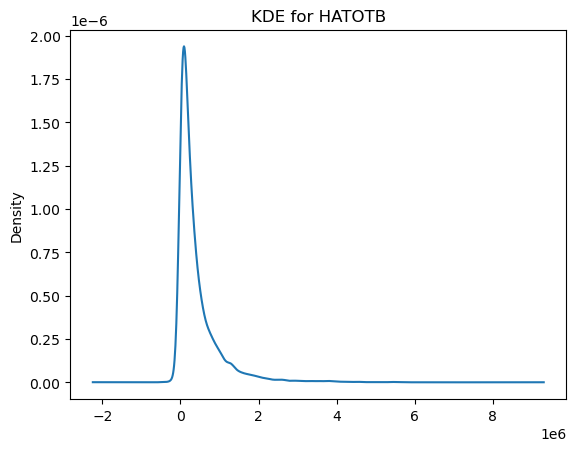

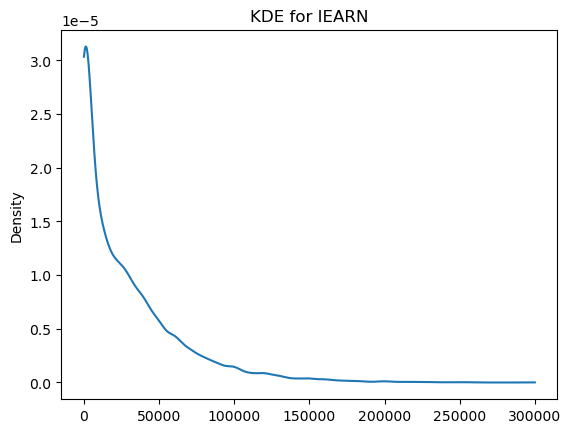

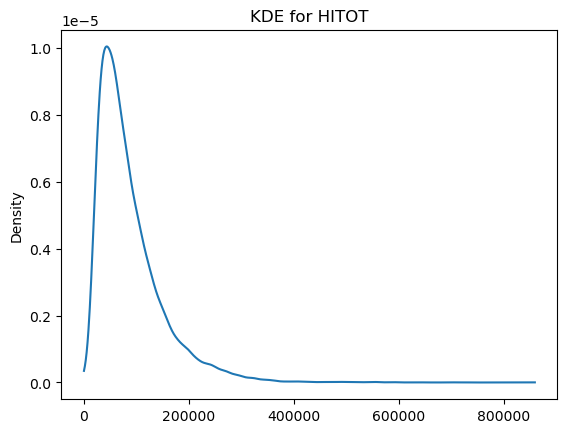

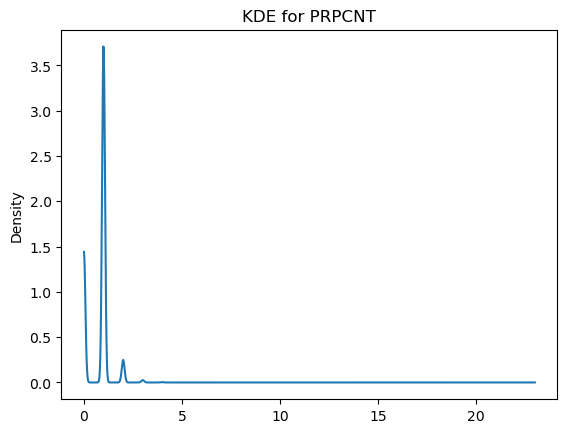

In [24]:
for i in continuous_features:
    target = cleaned_df[i]
    kde = gaussian_kde(target)
    x = np.linspace(target.min(), target.max(), 1000)

    # Evaluate the density
    density = kde(x)

    # Plotting
    plt.plot(x, density)
    plt.title('KDE for ' + i)
    plt.ylabel('Density')
    plt.show()

In [34]:
cleaned_df.describe()

,SHLT,BMI,MSTOT,COGTOT,INHPFN,INHPE,HHHRES,HCHILD,LIVSIB,HINPOV,HINPOVA,HAIRA,HATOTB,IEARN,HITOT,PENINC,HIGOV,PRPCNT,SLFEMP,RETMON
count,32714.000000,32714.000000,32714.000000,32714.000000,32714.000000,32714.0,32714.000000,32714.000000,32714.000000,32714.000000,32714.0,3.271400e+04,3.271400e+04,32714.000000,32714.00000,32714.000000,32714.000000,32714.000000,32714.000000,32714.000000
mean,2.448157,28.208712,13.500948,24.166993,0.013847,0.0,2.614141,3.189246,2.835269,0.000061,0.0,5.503602e+04,4.193559e+05,28315.890805,87282.60798,0.151800,0.555939,0.797518,0.246958,0.332946
std,0.933921,5.131488,1.672699,3.809814,0.134380,0.0,1.040586,1.820024,2.288164,0.007819,0.0,1.223822e+05,6.070576e+05,34700.152357,63772.66444,0.358833,0.496869,0.583523,0.431249,0.471275
min,1.000000,11.500000,4.000000,6.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,-2.245500e+06,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,24.700000,13.000000,22.000000,0.000000,0.0,2.000000,2.000000,1.000000,0.000000,0.0,0.000000e+00,8.000000e+04,549.060970,43544.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,27.400000,14.000000,24.000000,0.000000,0.0,2.000000,3.000000,2.000000,0.000000,0.0,0.000000e+00,2.180000e+05,17000.000000,70000.00000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,3.000000,31.000000,15.000000,27.000000,0.000000,0.0,3.000000,4.000000,4.000000,0.000000,0.0,5.000000e+04,5.160000e+05,41737.500000,111400.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,5.000000,58.100000,15.000000,35.000000,5.000000,0.0,13.000000,11.000000,17.000000,1.000000,0.0,1.475000e+06,9.304805e+06,300000.000000,859664.00000,1.000000,1.000000,23.000000,1.000000,1.000000
